# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febriana Nur Syifa Rizqi
- **Email:** syifa6276@gmail.com
- **ID Dicoding:** febriananursyifa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepada dari tahun ke tahun?
- Bagaimana pola trafic peminjaman sepeda dalam sehari?
- Bagaimana perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?
- Bagaimana perbedaan jumlah peminjaman sepeda pada setiap musim?
- Bagaimana pengaruh cuaca, temperatur, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepada?

## Import Semua Packages/Library yang Digunakan

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [122]:
day_df = pd.read_csv('bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [123]:
hour_df = pd.read_csv('bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Bike Sharing Dataset terdiri atas 2 tabel, yaitu `day_df` dan `hour_df`. `day_df` merupakan tabel yang memberikan informasi peminjaman sepeda secara harian sedangkan `hour_df` memberikan informasi peminjaman sepeda per jam.
- `hour_df` memiliki 17379 records sementara `day_df` memiliki 731 records.
- `hour_df` memiliki 17 kolom, yaitu:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
- `day_df` memiliki kolom yang sama dengan `hour_df`, kecuali kolom hr.

### Assessing Data

#### Menilai tabel `day_df`

In [124]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [125]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [126]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [127]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplicate data, maupun inacurate value pada tabel `day_df` maupun `hour_df`.
- Terdapat ketidaksesuaian tipe data pada kolom `dteday`. Kolom ini seharusnya memiliki tipe datetime karena mengandung informasi tanggal.
- Kolom `season`, `mnth`, `weekday`, dan `weathersit` berisi data kategoris sehingga perlu diubah menjadi string yang sesuai agar lebih mudah dipahami.

### Cleaning Data

#### Mengubah tipe data kolom `dteday` dari object menjadi datetime

In [128]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [129]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengganti isi dari kolom `season`, `yr`, `mnth`, `weekday`, dan `weathersit` dengan string yang sesuai

In [130]:
# Mengganti kode musim menjadi nama musim yang sesuai
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in day_df['season']:
    season = find_season(season)
    season_list.append(season)
    
day_df['season'] = season_list

In [131]:
# Mengganti kode tahun, bulan, dan hari menjadi string yang sesuai
day_df['yr'] = day_df['dteday'].dt.year
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df['weekday'] = day_df['dteday'].dt.day_name()

In [132]:
# Mengganti kode cuaca menjadi deskripsi cuaca yang sesuai
def find_weather(weather):
    weather_string = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
    return weather_string.get(weather)

weather_list = []

for weather in day_df['weathersit']:
    weather = find_weather(weather)
    weather_list.append(weather)
    
day_df['weathersit'] = weather_list

In [133]:
display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,December,0,Thursday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,December,0,Friday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,December,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,December,0,Sunday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [134]:
#day_df.to_csv("dashboard/cleaned_day.csv", index=False)
#hour_df.to_csv("dashboard/cleaned_hour.csv", index=False)

**Insight:**
- Tipe data dari kolom `dteday` yang semula adalah object telah diubah menjadi datetime64[ns].
- Kolom `season`, `yr`, `mnth`, `weekday`, dan `weathersit` yang semula berisi kode katogori telah diubah menjadi string nama kategori yang sesuai.

## Exploratory Data Analysis (EDA)

### Eksplorasi data `day_df`

In [135]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,January,NaN,Saturday,NaN,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [136]:
# Pivot Table 1.1: Jumlah Peminjaman Sepada berdasarkan Tahun
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
     nunique      sum   max  min         mean          std
yr                                                        
2011     365  1243103  6043  431  3405.761644  1378.753666
2012     366  2049576  8714   22  5599.934426  1788.667868

In [137]:
# Pivot Table 1.2: Jumlah Peminjaman Sepada berdasarkan Bulan
day_df.groupby(by='mnth').cnt.sum().sort_values(ascending=False)

mnth
August       351194
June         346342
September    345991
July         344948
May          331686
October      322352
April        269094
November     254831
March        228920
December     211036
February     151352
January      134933
Name: cnt, dtype: int64

In [138]:
# Pivot Table 1.3: Jumlah Peminjaman Sepada berdasarkan Musim
day_df.groupby(by="season").agg({
    "casual": ["mean", "std"],
    "registered": ["mean", "std"],
    "cnt": ["mean", "std"]
})

casual               registered                       cnt  \
               mean         std         mean          std         mean   
season                                                                   
Fall     729.112360  606.318118  3999.050562  1444.782557  4728.162921   
Spring  1106.097826  737.590829  3886.233696  1353.375628  4992.331522   
Summer  1202.611702  595.975032  4441.691489  1304.626949  5644.303191   
Winter   334.928177  387.655561  2269.204420  1200.269751  2604.132597   

                     
                std  
season               
Fall    1699.615261  
Spring  1695.977235  
Summer  1459.800381  
Winter  1399.942119

**Insight:**
- Berdasarkan rangkuman parameter statistik, didapatkan informasi bahwa terdapat 731 data peminjaman sepeda harian selama tahun 2011-2012. Rata-rata peminjaman sepeda dalam 1 hari adalah 4504 dan memiliki standar deviasi sebesar 1937. Standar deviasi yang cukup besar ini menunjukkan variasi data yang cukup menyebar. Nilai minimum dan maksimum peminjaman sepeda dalam 1 hari juga terpaut jauh, yaitu 22 peminjaman dan 8714 peminjaman.
- Pada pivot table 1.1, data peminjaman sepeda dikelompokkan berdasarkan tahun. Terdapat 365 instant pada tahun 2011 dan 366 instant pada tahun 2012. Hal ini menunjukkan bahwa data ini memuat informasi lengkap semua hari selama 2 tahun. Pivot table ini juga menunjukkan bahwa terdapat kenaikan total dan rata-rata peminjaman sepeda dari tahun 2011 ke tahun 2012. Jumlah peminjaman sepeda meningkat sebesar 64.88% dan rata-rata peminjaman meningkat sebesar 64.43%. Meskipun terjadi peningkatan total dan rata-rata, nilai minimum pemijaman sepeda pada tahun 2012 justru jatuh menjadi 22 peminjaman.
- Pada pivot table 1.2, data peminjaman sepeda dikelompokkan berdasarkan bulan. Jumlah peminjaman sepeda setiap bulan cukup bervariasi, dengan jumlah tertinggi sebesar 351194 pada bulan Agustus dan jumlah terendah sebesar 134933 pada bulan Januari.
- Pada pivot table 1.3, data peminjaman sepeda dikelompokkan berdasarkan musim. Baik pengguna lepas maupun pengguna terdaftar memiliki pola yang sama, yaitu urutan musim dengan peminjam tertinggi hingga terendah adalah Summer-Spring-Fall-Winter. Urutan musim ini juga berhubungan dengan urutan bulan yang disajikan dalam pivot table 1.2. Bulan dengan rata-rata peminjaman sepeda tertinggi (Agustus dan Juni) merupakan waktu dimana musim panas berlangsung, sedangkan bulan dengan rata-rata peminjaman sepeda terendah (Januari, Februari, dan Desember) merupakan waktu dimana musim dingin berlangsung.

### Eksplorasi data `hour_df`

In [139]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [140]:
# Pivot Table 2.1: Jumlah Peminjaman Sepada berdasarkan Waktu
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["sum", "mean", "std"],
    "registered": ["sum", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

instant casual                       registered                          \
   nunique    sum       mean        std        sum        mean         std   
hr                                                                           
0      726   7375  10.158402  10.667953      31755   43.739669   34.019585   
1      724   4709   6.504144   7.735334      19455   26.871547   27.344153   
2      715   3412   4.772028   6.514780      12940   18.097902   21.303895   
3      697   1893   2.715925   4.315795       6281    9.011478    9.743691   
4      697    874   1.253945   1.887669       3554    5.098996    3.134479   
5      717   1012   1.411437   1.790581      13249   18.478382   12.674751   
6      725   3017   4.161379   3.691509      52115   71.882759   53.535307   
7      727   8037  11.055021   8.356205     146134  201.009629  157.120459   
8      727  15761  21.679505  13.741229     245240  337.331499  229.698404   
9      727  22458  30.891334  24.472856     136980  188.418157   84.633490   
10     727  33789  46.477304  41.346206      92468  127.191197   66.281668   
11     727  43286  59.540578  54.481788     108034  148.602476   79.090301   
12     728  49718  68.293956  64.394237     134696  185.021978   89.240873   
13     729  52713  72.308642  69.819228     132206  181.352538   87.424775   
14     729  55089  75.567901  71.599225     120563  165.381344   84.055205   
15     729  54606  74.905350  70.289359     128543  176.327846   84.488219   
16     730  53834  73.745205  67.015206     173914  238.238356  103.765726   
17     730  54220  74.273973  61.491021     282640  387.178082  211.676303   
18     728  44496  61.120879  50.981553     265276  364.390110  203.599896   
19     728  35505  48.770604  42.328913     191284  262.752747  138.708622   
20     728  26378  36.233516  32.103347     138172  189.796703  100.293791   
21     728  20570  28.255495  25.378252     104875  144.059066   73.149848   
22     728  16200  22.252747  20.450211      79412  109.082418   55.252765   
23     728  11065  15.199176  13.804596      52876   72.631868   40.446431   

       cnt                          
       sum        mean         std  
hr                                  
0    39130   53.898072   42.307910  
1    24164   33.375691   33.538727  
2    16352   22.869930   26.578642  
3     8174   11.727403   13.239190  
4     4428    6.352941    4.143818  
5    14261   19.889819   13.200765  
6    55132   76.044138   55.084348  
7   154171  212.064649  161.441936  
8   261001  359.011004  235.189285  
9   159438  219.309491   93.703458  
10  126257  173.668501  102.205413  
11  151320  208.143054  127.495536  
12  184414  253.315934  145.081134  
13  184919  253.661180  148.107657  
14  175652  240.949246  147.271574  
15  183149  251.233196  144.632541  
16  227748  311.983562  148.682618  
17  336860  461.452055  232.656611  
18  309772  425.510989  224.639304  
19  226789  311.523352  161.050359  
20  164550  226.030220  119.670164  
21  125445  172.314560   89.788893  
22   95612  131.335165   69.937782  
23   63941   87.831044   50.846889

**Insight:**
- Berdasarkan rangkuman parameter statistik, didapatkan informasi bahwa terdapat 17379 data peminjaman sepeda per jam selama tahun 2011-2012. Rata-rata peminjaman sepeda dalam 1 jam adalah 189 dan memiliki standar deviasi sebesar 181. Standar deviasi yang cukup besar ini menunjukkan variasi data yang cukup menyebar. Nilai minimum dan maksimum peminjaman sepeda dalam 1 jam juga terpaut jauh, yaitu 1 peminjaman dan 977 peminjaman.
- Pada pivot table 2.1, data peminjaman sepeda dikelompokkan berdasarkan waktu. Masing-masing kategori waktu memiliki jumlah dan rata-rata peminjaman yang bervariasi. Rata-rata peminjaman sepeda pada dini hari cukup kecil, lalu akan meningkat pada pagi hingga malam dan menurun lagi pada tengah malam. Rata-rata peminjaman sepeda terendah terjadi pada pukul 04.00 sedangkan peminjaman sepeda tertinggi terjadi pada pukul 17.00 yang bertepatan dengan jam pulang kerja.
- Pivot table 2.1 juga menampilkan data peminjaman sepeda per jam pada pengguna lepas dan pengguna terdaftar. Pada semua kategori waktu, rata-rata peminjaman sepeda untuk pengguna terdaftar selalu lebih besar daripada pengguna lepas. Rata-rata peminjaman sepeda tertinggi untuk pengguna terdaftar terjadi pada pukul 17.00 sedangkan untuk pengguna lepas terjadi pada pukul 14.00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepada dari tahun ke tahun?

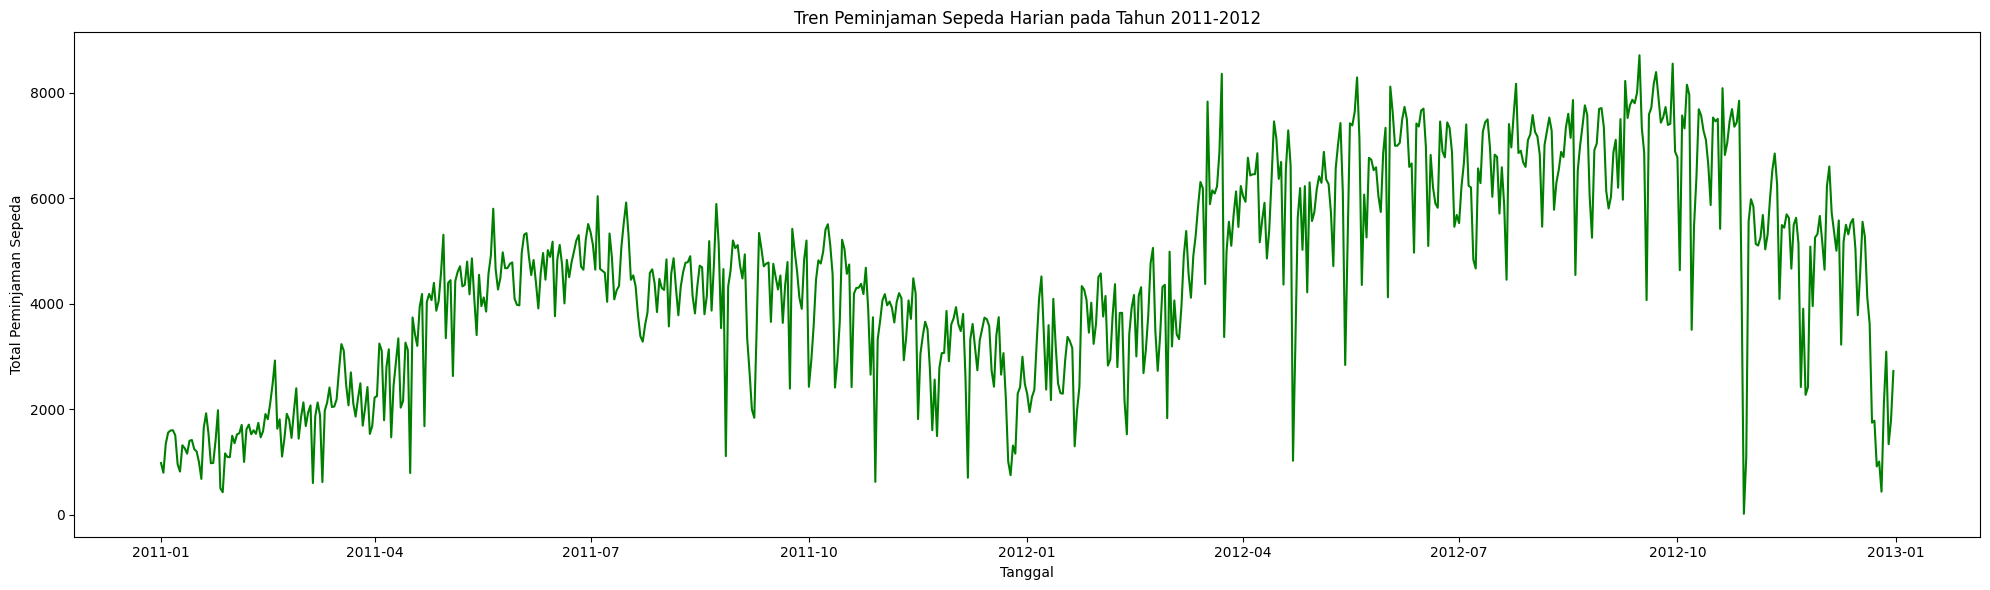

In [141]:
# Gambar 1.1: Tren Peminjaman Sepeda Harian pada Tahun 2011-2012
plt.figure(figsize=(20,6))

sns.lineplot(x="dteday", y="cnt", data=day_df, color='green')

plt.xlabel("Tanggal")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Harian pada Tahun 2011-2012")

plt.tight_layout()
plt.show()

In [142]:
monthly_share_df = day_df.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_share_df.index = monthly_share_df.index.strftime('%b 20%y')
monthly_share_df = monthly_share_df.reset_index()
display(monthly_share_df)

,dteday,casual,registered,cnt
0,Jan 2011,3073,35116,38189
1,Feb 2011,6242,41973,48215
2,Mar 2011,12826,51219,64045
3,Apr 2011,22346,72524,94870
4,May 2011,31050,104771,135821
5,Jun 2011,30612,112900,143512
6,Jul 2011,36452,104889,141341
7,Aug 2011,28842,107849,136691
8,Sep 2011,26545,100873,127418
9,Oct 2011,25222,98289,123511


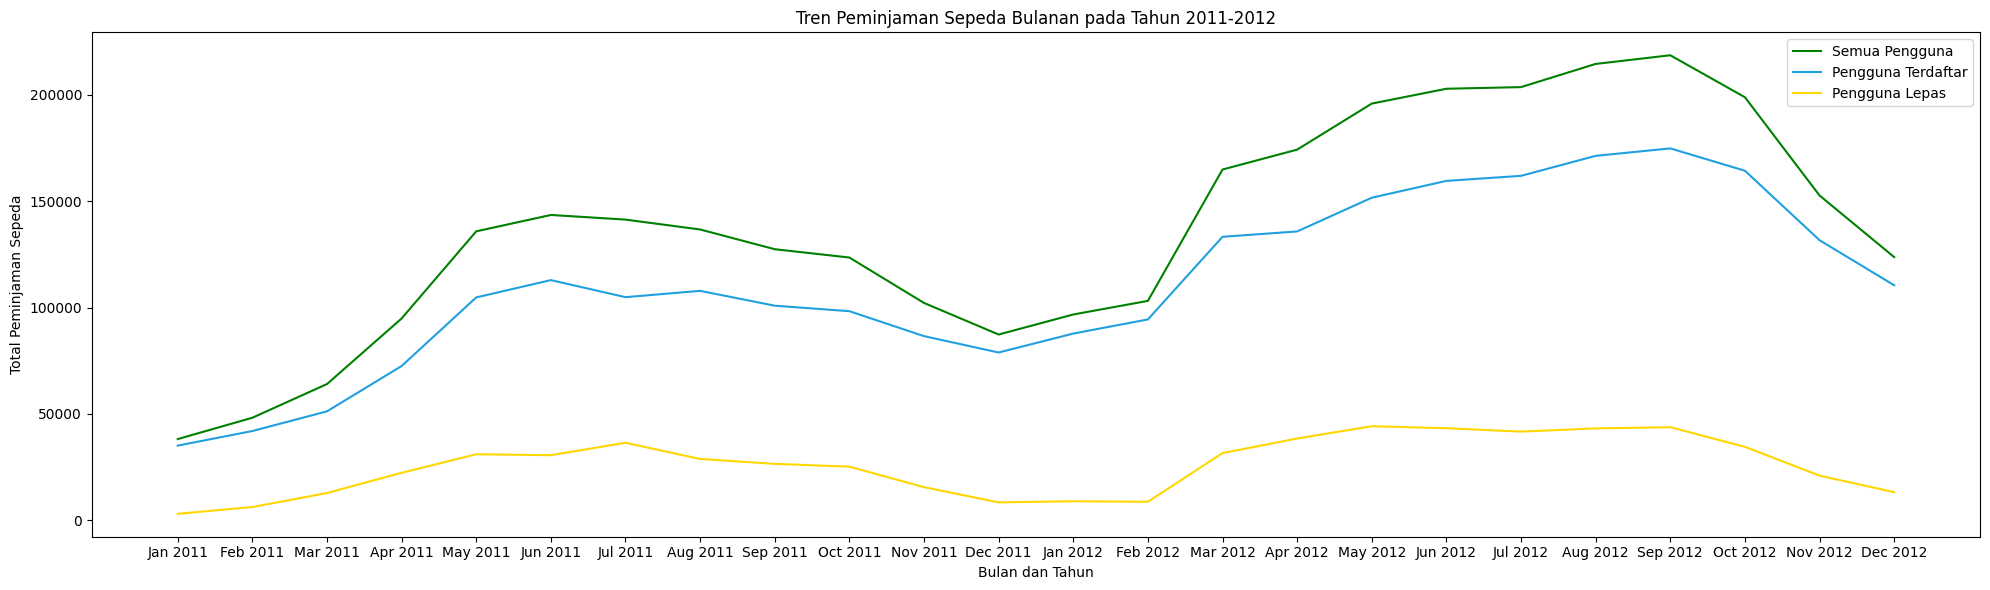

In [143]:
# Gambar 1.2: Tren Peminjaman Sepeda Bulanan pada Tahun 2011-2012
plt.figure(figsize=(20,6))

sns.lineplot(x="dteday", y="cnt", data=monthly_share_df, color='green', label='Semua Pengguna')
sns.lineplot(x="dteday", y="registered", data=monthly_share_df, color='#20a0de', label='Pengguna Terdaftar')
sns.lineplot(x="dteday", y="casual", data=monthly_share_df, color='#ffd700', label='Pengguna Lepas')

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Bulanan pada Tahun 2011-2012")
plt.legend()

plt.tight_layout()
plt.show()

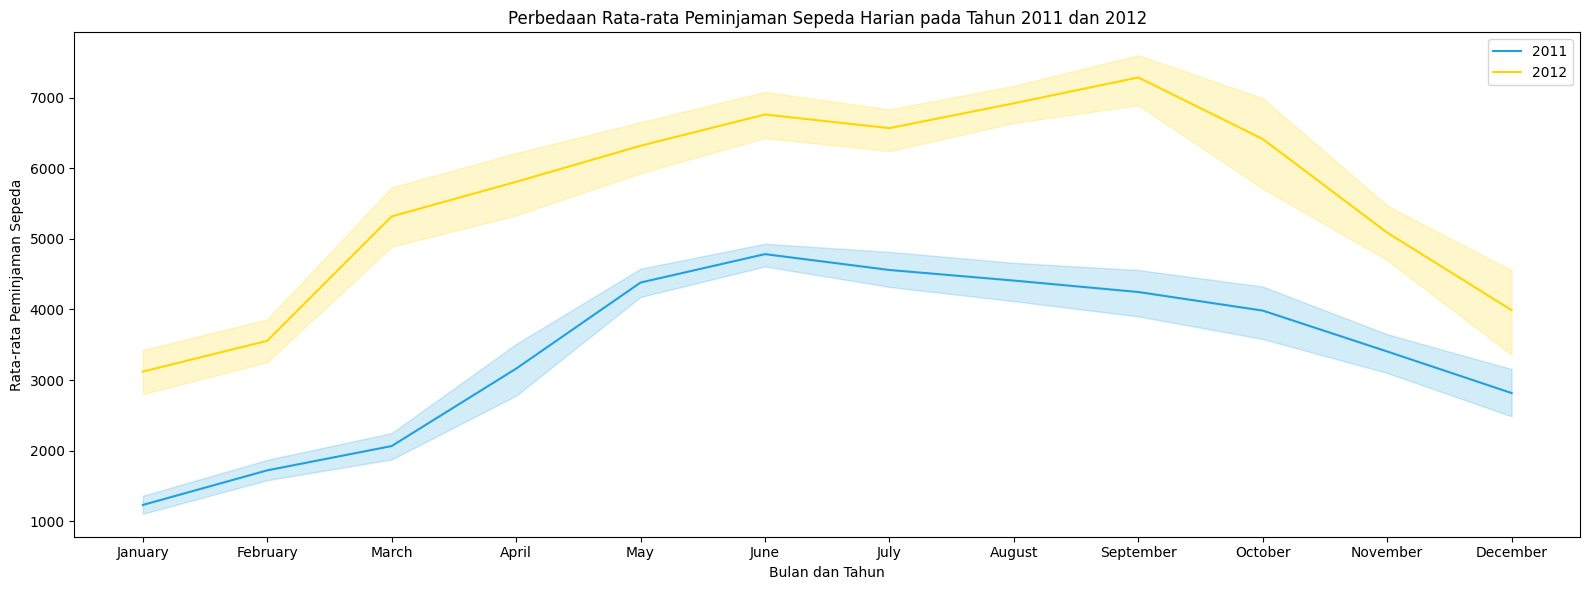

In [144]:
# Gambar 1.3: Perbedaan Rata-rata Peminjaman Sepeda Harian pada Tahun 2011 dan 2012
plt.figure(figsize=(16,6))

sns.lineplot(x="mnth", y="cnt", data=day_df[day_df['yr'] == 2011], color='#20a0de', label='2011')
sns.lineplot(x="mnth", y="cnt", data=day_df[day_df['yr'] == 2012], color='#ffd700', label='2012')

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Perbedaan Rata-rata Peminjaman Sepeda Harian pada Tahun 2011 dan 2012")
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola trafic peminjaman sepeda dalam sehari?

In [145]:
hourly_user_mean = hour_df.groupby(by="hr").cnt.mean()
hourly_casual_mean = hour_df.groupby(by="hr").casual.mean()
hourly_registered_mean = hour_df.groupby(by="hr").registered.mean()

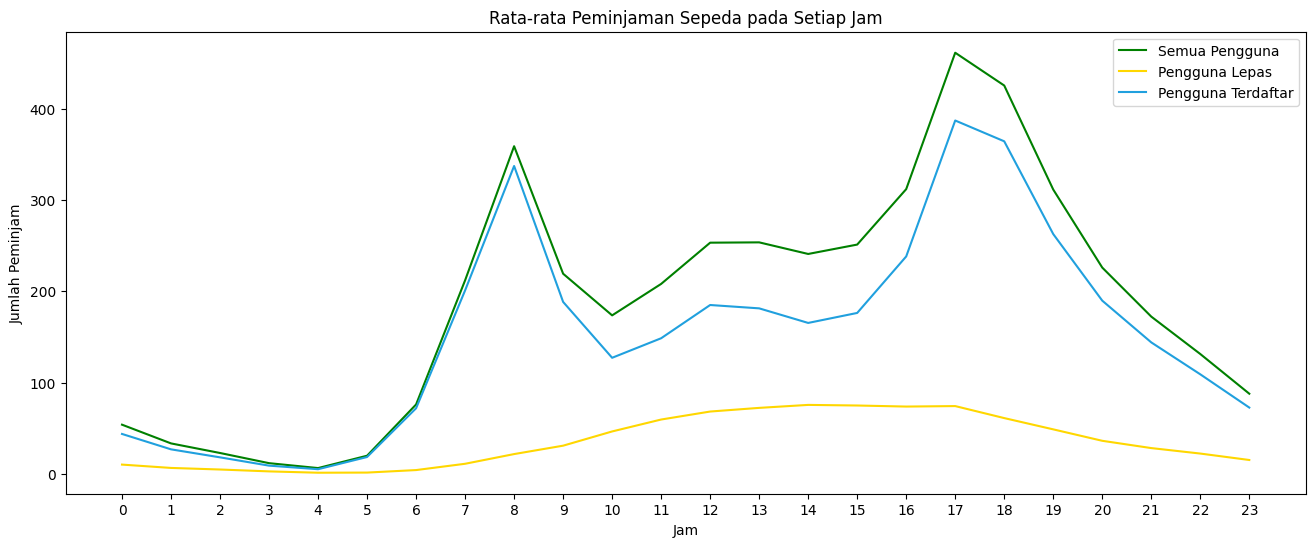

In [146]:
# Gambar 2.1: Rata-rata Peminjaman Sepeda pada Setiap Jam
plt.figure(figsize=(16,6))

sns.lineplot(hourly_user_mean, color='green', label='Semua Pengguna')
sns.lineplot(hourly_casual_mean, color='#ffd700', label='Pengguna Lepas')
sns.lineplot(hourly_registered_mean, color='#20a0de', label='Pengguna Terdaftar')

plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjam")
plt.title("Rata-rata Peminjaman Sepeda pada Setiap Jam")
plt.xticks(range(24))

plt.show()

### Pertanyaan 3: Bagaimana perbedaan jumlah peminjaman sepeda pada hari kerja dan hari libur?

In [147]:
weekday_group = day_df.groupby(by="weekday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt":  ["sum", "mean"]
})

# Reset index agar lebih mudah diakses
weekday_group.columns = ['casual_sum', 'casual_mean', 'registered_sum', 'registered_mean', 'cnt_sum', 'cnt_mean']
weekday_group = weekday_group.reset_index()

# Mengurutkan nama hari
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_group['weekday'] = pd.Categorical(weekday_group['weekday'], categories=ordered_days, ordered=True)
weekday_group = weekday_group.sort_values('weekday')

display(weekday_group)

,weekday,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
1,Monday,70784,674.133333,384719,3663.990476,455503,4338.123810
5,Tuesday,57843,556.182692,411266,3954.480769,469109,4510.663462
6,Wednesday,57319,551.144231,415729,3997.394231,473048,4548.538462
4,Thursday,61460,590.961538,423935,4076.298077,485395,4667.259615
0,Friday,78238,752.288462,409552,3938.000000,487790,4690.288462
2,Saturday,153852,1465.257143,323955,3085.285714,477807,4550.542857
3,Sunday,140521,1338.295238,303506,2890.533333,444027,4228.828571


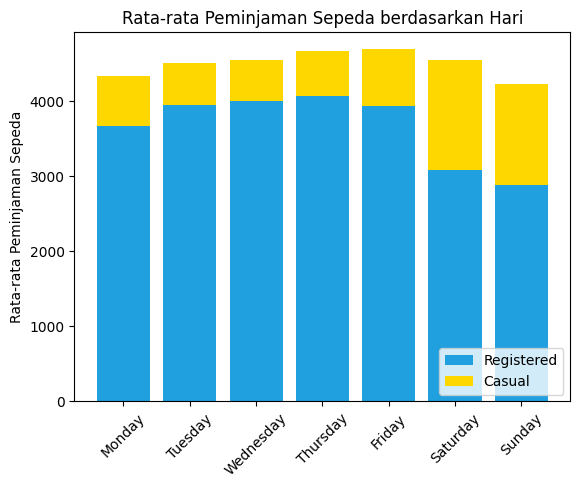

In [148]:
# Gambar 3.1: Rata-rata Peminjaman Sepeda berdasarkan Hari
fig, ax = plt.subplots()

ax.bar(weekday_group['weekday'], weekday_group['registered_mean'], label='Registered', color="#20a0de")
ax.bar(weekday_group['weekday'], weekday_group['casual_mean'], bottom=weekday_group['registered_mean'], label='Casual', color="#ffd700")

ax.set_ylabel('Rata-rata Peminjaman Sepeda')
ax.set_title('Rata-rata Peminjaman Sepeda berdasarkan Hari')
plt.legend(loc='lower right', fontsize=10)
plt.xticks(rotation=45)

plt.show()

In [149]:
workingday_group = day_df.groupby(by="workingday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt":  ["sum", "mean"]
})

# Reset index agar lebih mudah diakses
workingday_group.columns = ['casual_sum', 'casual_mean', 'registered_sum', 'registered_mean', 'cnt_sum', 'cnt_mean']
workingday_group = workingday_group.reset_index()
workingday_group['workingday'] = workingday_group['workingday'].replace({0: 'Hari Libur', 1: 'Hari Kerja'})

display(workingday_group)

,workingday,casual_sum,casual_mean,registered_sum,registered_mean,cnt_sum,cnt_mean
0,Hari Libur,316732,1371.134199,683537,2959.034632,1000269,4330.168831
1,Hari Kerja,303285,606.570000,1989125,3978.250000,2292410,4584.820000


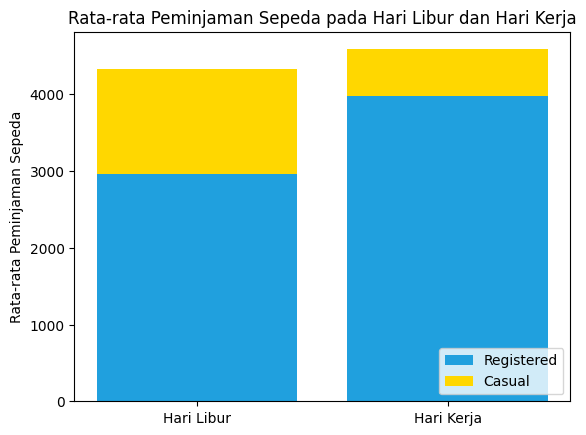

In [150]:
# Gambar 3.2: Rata-rata Peminjaman Sepeda pada Setiap Jam
fig, ax = plt.subplots()

ax.bar(workingday_group['workingday'], workingday_group['registered_mean'], label='Registered', color="#20a0de")
ax.bar(workingday_group['workingday'], workingday_group['casual_mean'], bottom=workingday_group['registered_mean'], label='Casual', color="#ffd700")

ax.set_ylabel('Rata-rata Peminjaman Sepeda')
ax.set_title('Rata-rata Peminjaman Sepeda pada Hari Libur dan Hari Kerja')

plt.legend(loc='lower right', fontsize=10)
plt.show()

### Pertanyaan 4: Bagaimana perbedaan jumlah peminjaman sepeda pada setiap musim?

In [151]:
season_group = day_df.groupby('season').cnt.sum().reset_index()
display(season_group)

,season,cnt
0,Fall,841613
1,Spring,918589
2,Summer,1061129
3,Winter,471348


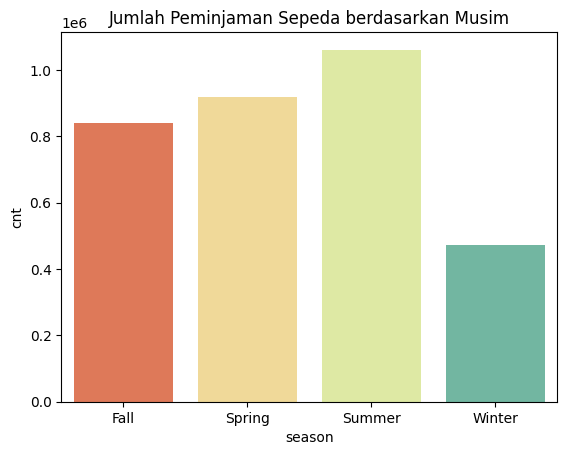

In [152]:
# Gambar 4.1: Jumlah Peminjaman Sepeda berdasarkan Musim
sns.barplot(data=season_group, x="season", y="cnt", hue="season", palette="Spectral", legend=False, errorbar=None)
plt.title("Jumlah Peminjaman Sepeda berdasarkan Musim")
plt.show()

### Pertanyaan 5: Bagaimana pengaruh temperatur, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepada?

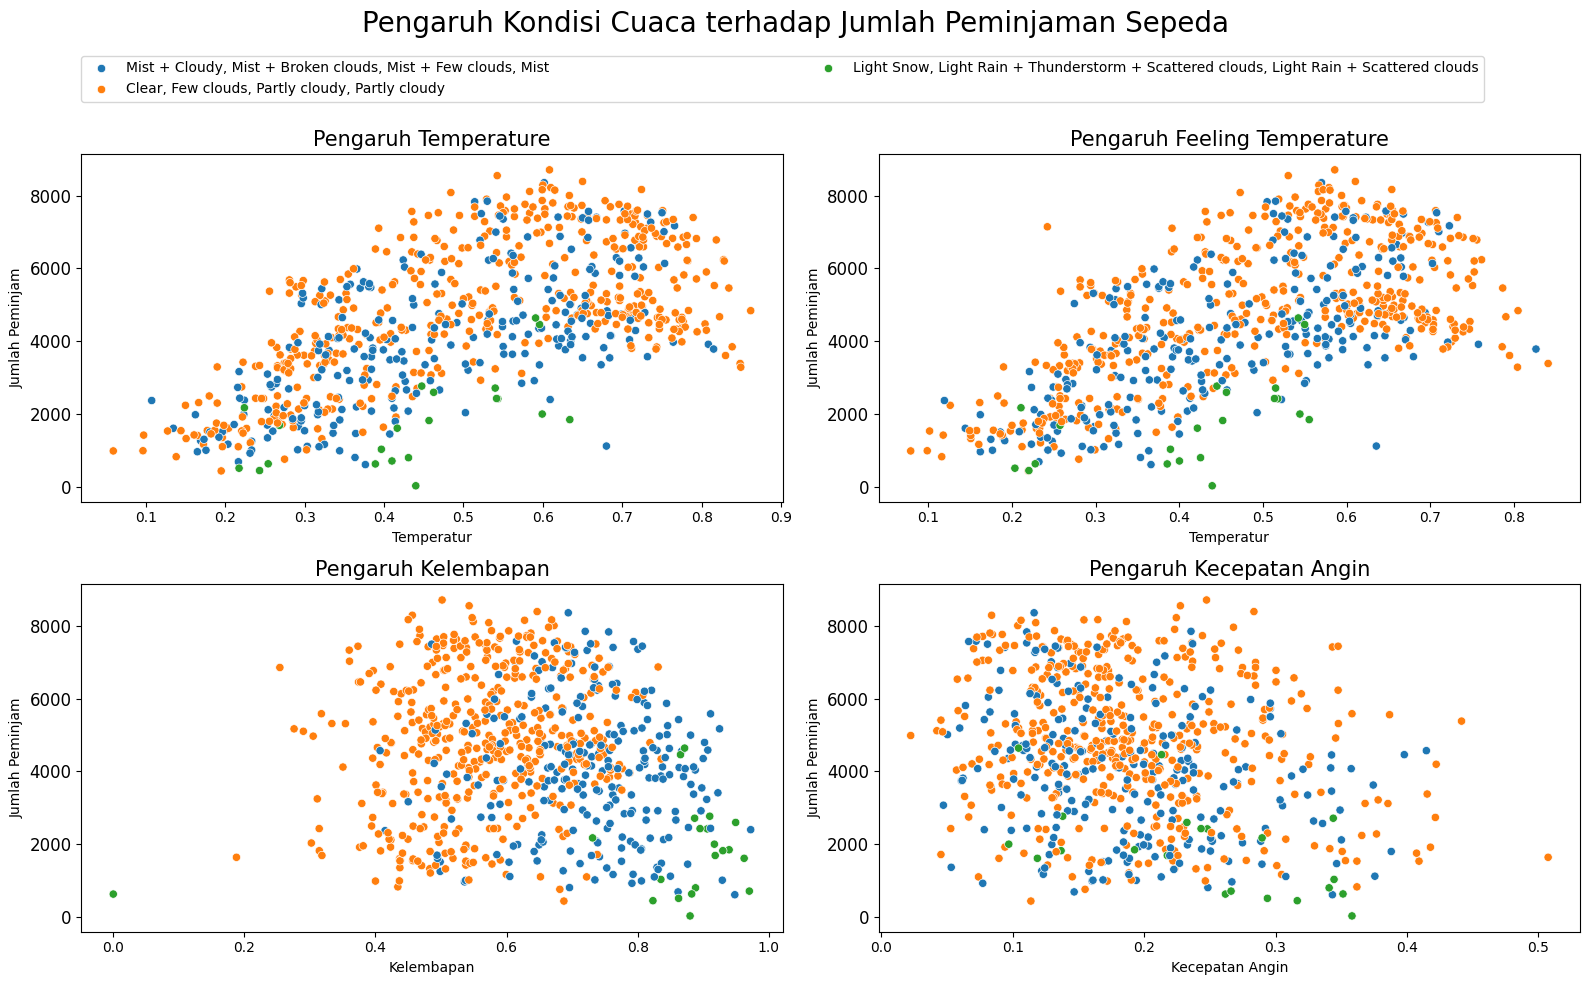

In [153]:
# Gambar 5.1: Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.scatterplot(x="temp", y="cnt", hue="weathersit", data=day_df, ax=ax[0, 0])
ax[0, 0].set_ylabel("Jumlah Peminjam")
ax[0, 0].set_xlabel("Temperatur")
ax[0, 0].set_title("Pengaruh Temperature", loc="center", fontsize=15)
ax[0, 0].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="atemp", y="cnt", hue="weathersit", data=day_df, ax=ax[0, 1], legend=False)
ax[0, 1].set_ylabel("Jumlah Peminjam")
ax[0, 1].set_xlabel("Temperatur")
ax[0, 1].set_title("Pengaruh Feeling Temperature", loc="center", fontsize=15)
ax[0, 1].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="hum", y="cnt", hue="weathersit", data=day_df, ax=ax[1, 0], legend=False)
ax[1, 0].set_ylabel("Jumlah Peminjam")
ax[1, 0].set_xlabel("Kelembapan")
ax[1, 0].set_title("Pengaruh Kelembapan", loc="center", fontsize=15)
ax[1, 0].tick_params(axis='y', labelsize=12)

sns.scatterplot(x="windspeed", y="cnt", hue="weathersit", data=day_df, ax=ax[1, 1], legend=False)
ax[1, 1].set_ylabel("Jumlah Peminjam")
ax[1, 1].set_xlabel("Kecepatan Angin")
ax[1, 1].set_title("Pengaruh Kecepatan Angin", loc="center", fontsize=15)
ax[1, 1].tick_params(axis='y', labelsize=12)

# Membuat satu legend gabungan di luar plot
ax[0, 0].legend(bbox_to_anchor=(0., 1.15, 2., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
fig.subplots_adjust(top=0.99)

# Menambahkan judul keseluruhan
plt.suptitle("Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda", fontsize=20)
plt.tight_layout()
plt.show()

**Insight:**
- Gambar 1.1: Terdapat pola peminjaman sepeda harian yang sama antara tahun 2011 dan 2012. Peminjaman sepeda harian cenderung naik dari awal tahun hingga bulan Juni. Kemudian, peminjaman sepeda cenderung stabil dari bulan Juni hingga September. 
- Gambar 1.2: Total peminjaman sepeda bulanan tertinggi tahun 2011 dan 2012 terjadi pada bulan yang berbeda. Total peminjaman sepeda bulanan tertinggi pada tahun 2011 terjadi pada bulan Juni sedangkan pada tahun 2012 terjadi pada bulan September.
- Gambar 1.3: Terjadi peningkatan peminjaman sepeda dari tahun 2011 ke tahun 2012. Rata-rata peminjaman sepeda bulanan tahun 2012 selalu berada di atas rata-rata peminjaman sepeda bulanan tahun 2011. Selisih rata-rata peminjaman sepeda juga terlihat cukup signifikan.

- Gambar 2.1: Terdapat pola kenaikan peminjaman sepeda pada waktu-waktu tertentu, misalnya pada jam berangkat kerja (08.00) dan jam pulang kerja (17.00).

- Gambar 3.1: Rata-rata peminjaman sepeda mengalami tren kenaikan dari hari Senin hingga Jumat, lalu akan turun pada hari Sabtu dan Minggu. Jika dilihat dari komposisinya, peminjaman sepeda oleh pengguna terdaftar menurun saat hari Sabtu dan Minggu sedangkan peminjaman sepeda oleh pengguna lepas meningkat.
- Gambar 3.2: Rata-rata peminjaman sepeda pada hari kerja lebih tinggi daripada hari libur. Jika dilihat dari komposisinya, pengguna lepas cenderung lebih banyak meminjam sepeda pada hari libur sedangkan pengguna terdaftar lebih banyak meminjam sepeda pada hari kerja.

- Gambar 4.1: Terdapat perbedaan jumlah pengguna di berbagai musim. Urutan musim dengan jumlah peminjaman sepeda tertinggi hingga terendah adalah summer-spring-fall-winter. Dari pola ini terlihat bahwa musim yang lebih hangat memiliki jumlah peminjaman sepeda yang lebih tinggi.

- Gambar 5.1: Kondisi yang berpengaruh terhadap jumlah peminjaman sepeda adalah temperature, feeling temperature, dan kelembapan. Sementara itu kecepatan angin kurang memberikan pengaruh signifikan terhadap jumlah peminjaman sepeda. Temperatur dan feeling temperatur berbanding lurus dengan jumlah peminjaman sepeda sehingga ketika suhunya menigkat maka jumlah peminjaman sepeda juga cenderung meningkat. Sementara itu, kelembapan justru berbanding terbalik dengan jumlah peminjaman sepeda sehingga ketika kelembapannya semakin tinggi maka jumlah peminjaman sepeda cenderung menurun.

## Analisis Lanjutan - Binning

Menambahkan kategori jumlah peminjaman sepeda (rendah, sedang, tinggi) pada data harian. Berikut ini kriteria untuk kategori yang dipakai:
- Rendah: Jumlah peminjaman sepeda harian (kolom `cnt`) memiliki nilai kurang dari mean-std
- Sedang: Jumlah peminjaman sepeda harian (kolom `cnt`) memiliki nilai antara mean-std hingga mean+std
- Tinggi: Jumlah peminjaman sepeda harian (kolom `cnt`) memiliki nilai lebih dari mean+std

In [154]:
mean_cnt = day_df['cnt'].mean()
std_cnt = day_df['cnt'].std()

# Membuat kolom baru berdasarkan kolom cnt (rendah, sedang, tinggi)
day_df['cnt_category'] = pd.cut(day_df['cnt'],
                                bins=[0, mean_cnt - std_cnt, mean_cnt + std_cnt, day_df['cnt'].max()],
                                labels=['Rendah', 'Sedang', 'Tinggi'])

display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_category
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,Rendah
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801,Rendah
2,3,2011-01-03,Winter,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349,Rendah
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562,Rendah
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,December,0,Thursday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.254167,0.226642,0.652917,0.350133,247,1867,2114,Rendah
727,728,2012-12-28,Winter,2012,December,0,Friday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.255046,0.590000,0.155471,644,2451,3095,Sedang
728,729,2012-12-29,Winter,2012,December,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.253333,0.242400,0.752917,0.124383,159,1182,1341,Rendah
729,730,2012-12-30,Winter,2012,December,0,Sunday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.255833,0.231700,0.483333,0.350754,364,1432,1796,Rendah


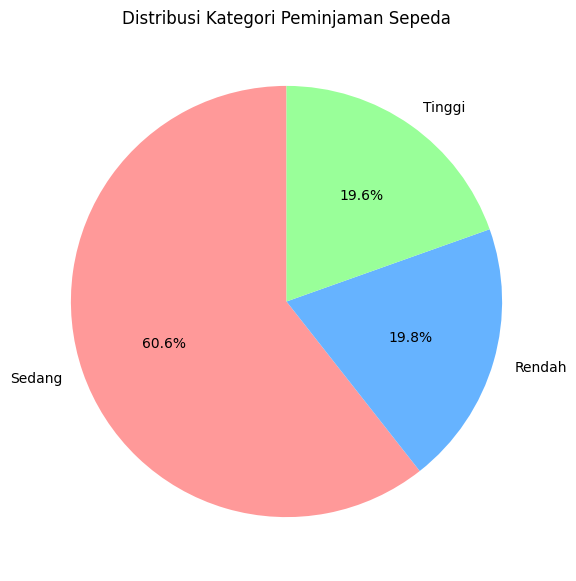

In [155]:
cnt_category_counts = day_df['cnt_category'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(cnt_category_counts, labels=cnt_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi Kategori Jumlah      Peminjaman Sepeda')

plt.show()

**Insight:**
- Kategori "Sedang" mendominasi data, dengan lebih dari setengah peminjaman sepeda masuk dalam rentang ini. Ini menunjukkan bahwa peminjaman sepeda berada pada tingkat moderat pada sebagian besar waktu, tidak terlalu rendah atau terlalu tinggi. Sementara itu, peminjaman dalam kategori "Rendah" dan "Tinggi" memiliki distribusi yang hampir sama, masing-masing sekitar 20%. Hal ini menunjukkan bahwa ada keseimbangan antara hari-hari dengan peminjaman sepeda yang sangat sedikit dan hari-hari dengan peminjaman sepeda yang sangat tinggi.
- Dengan distribusi ini, bisa disimpulkan bahwa peminjaman sepeda memiliki pola yang cenderung normal, dengan sebagian besar data berkumpul di sekitar mean (kategori "Sedang").

## Conclusion

- Conclution pertanyaan 1: Peminjaman sepeda menunjukkan tren peningkatan dari tahun 2011 ke 2012. Rata-rata peminjaman bulanan pada tahun 2012 selalu lebih tinggi dibandingkan dengan tahun 2011, dengan peningkatan yang cukup signifikan di sebagian besar bulan. Peminjaman sepeda meningkat di pertengahan tahun dan stabil di bulan Juni hingga September. Namun, bulan dengan peminjaman tertinggi berbeda untuk setiap tahun—Juni di 2011 dan September di 2012.
- Conclution pertanyaan 2: Terdapat pola penggunaan sepeda yang jelas pada hari kerja, terutama pada jam-jam sibuk seperti pukul 08.00 (jam berangkat kerja) dan pukul 17.00 (jam pulang kerja). Hal ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi untuk bekerja atau beraktivitas pada jam-jam tersebut.
- Conclution pertanyaan 3: Rata-rata peminjaman sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Pengguna terdaftar lebih aktif meminjam sepeda pada hari kerja, sementara pengguna lepas lebih aktif pada akhir pekan atau hari libur. Ini menunjukkan bahwa banyak pengguna terdaftar yang memanfaatkan sepeda sebagai alat transportasi rutin, sementara pengguna lepas cenderung meminjam untuk aktivitas rekreasi di hari libur.
- Conclution pertanyaan 4: Peminjaman sepeda bervariasi secara signifikan berdasarkan musim. Musim panas (summer) memiliki jumlah peminjaman sepeda tertinggi, sedangkan musim dingin (winter) memiliki jumlah peminjaman terendah. Ini menunjukkan bahwa kondisi cuaca yang hangat mendorong peningkatan aktivitas bersepeda, sedangkan cuaca dingin mengurangi jumlah peminjaman.
- Conclution pertanyaan 5: Faktor-faktor cuaca seperti temperatur, “feeling temperature” (suhu yang dirasakan), dan kelembapan memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Jumlah peminjaman meningkat seiring dengan kenaikan temperatur, namun cenderung menurun ketika kelembapan tinggi. Sementara itu, kecepatan angin tidak memberikan pengaruh signifikan terhadap jumlah peminjaman. Penggunaan sepeda cenderung optimal pada cuaca yang lebih hangat dan kelembapan yang rendah.